#### V and J Genes in Embedding Space

Analyze the distribution of V and J genes in the given dataset, and plot them in the embedding space.

In [2]:
cd ..

/home/ubuntu/CVC


#### Set Environment

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os, sys
import collections
import matplotlib
from matplotlib.colors import ListedColormap
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

SRC_DIR = "cvc"
assert os.path.isdir(SRC_DIR), f"Cannot find src dir: {SRC_DIR}"
sys.path.append(SRC_DIR)
from lab_notebooks.utils import TRANSFORMER, DEVICE, DATA_DIR
MODEL_DIR = os.path.join(SRC_DIR, "models")
sys.path.append(MODEL_DIR)

FILT_EDIT_DIST = True

PLOT_DIR = os.path.join(os.path.dirname(SRC_DIR), "plots/CDR3_data_plots")
if not os.path.isdir(PLOT_DIR):
    os.makedirs(PLOT_DIR)
PLOT_DIR

#### Prepare Data

In [4]:
gene_type = 'J' #'V'

In [5]:
# data with j gene
if gene_type == 'J':
    data_dir = DATA_DIR + "sequences_j_gene_csv_17M.csv"
else:
    data_dir = DATA_DIR + "sequences_v_gene_csv_17M_pub_priv.csv"

In [6]:
# load data
data_to_use = pd.read_csv(data_dir,engine="pyarrow")
data_to_use

,,amino_acid,j_gene,sample
0,0,CASSFELSGGNQPQHF,TCRBJ01-05,1064_TCRB
1,1,CASNEEGNQQYF,TCRBJ02-07,1064_TCRB
2,2,CASSSTGNTGELFF,TCRBJ02-02,1064_TCRB
3,3,CASSTEQVMNTEAFF,TCRBJ01-01,1064_TCRB
4,4,CASSFSALAGVIEQFF,TCRBJ02-01,1064_TCRB


In [8]:
# edit column names
if gene_type=='J':
    data_to_use.rename(columns={'j_gene': 'jGeneName'}, inplace=True)
else:
    data_to_use.rename(columns={'v_gene': 'vGeneName'}, inplace=True)

#### Display Genes

In [9]:
if gene_type=='J':
    gene_name = 'jGeneName'
else:
    gene_name = 'vGeneName'

In [10]:
len(collections.Counter(data_to_use[gene_name]))

15

In [11]:
collections.Counter(data_to_use[gene_name])

Counter({'TCRBJ01-05': 1396112,
         'TCRBJ02-07': 2648085,
         'TCRBJ02-02': 1221133,
         'TCRBJ01-01': 2230979,
         'TCRBJ02-01': 2270238,
         'TCRBJ02-03': 1680997,
         'TCRBJ01-06': 822479,
         'TCRBJ01-02': 2075902,
         'TCRBJ02-05': 1393111,
         'TCRBJ01-03': 681331,
         'TCRBJ02-06': 270591,
         'TCRBJ02-04': 235783,
         'TCRBJ01-04': 813474,
         'unresolved': 6168,
         'TCRBJ02-02P': 2})

In [12]:
# remove irrelevant row
if gene_type=='J':
    data_to_use_filtered = data_to_use[data_to_use[gene_name] != 'unresolved']
    data_to_use_filtered = data_to_use_filtered[data_to_use_filtered[gene_name] != 'TCRBJ02-02P']
else:
    data_to_use_filtered = data_to_use[data_to_use[gene_name] != 'unresolved']
    data_to_use_filtered = data_to_use_filtered[~data_to_use_filtered[gene_name].str.contains('-or', regex=False)]
    # remove genes that their count is less than 200
    data_to_use_filtered = data_to_use_filtered[data_to_use_filtered.groupby(gene_name)[gene_name].transform('count') > 40000]
collections.Counter(data_to_use_filtered[gene_name])

Counter({'TCRBJ01-05': 1396112,
         'TCRBJ02-07': 2648085,
         'TCRBJ02-02': 1221133,
         'TCRBJ01-01': 2230979,
         'TCRBJ02-01': 2270238,
         'TCRBJ02-03': 1680997,
         'TCRBJ01-06': 822479,
         'TCRBJ01-02': 2075902,
         'TCRBJ02-05': 1393111,
         'TCRBJ01-03': 681331,
         'TCRBJ02-06': 270591,
         'TCRBJ02-04': 235783,
         'TCRBJ01-04': 813474})

In [14]:
len(data_to_use_filtered)

17740215

In [13]:
list(collections.Counter(data_to_use_filtered[gene_name]).keys())

['TCRBJ01-05',
 'TCRBJ02-07',
 'TCRBJ02-02',
 'TCRBJ01-01',
 'TCRBJ02-01',
 'TCRBJ02-03',
 'TCRBJ01-06',
 'TCRBJ01-02',
 'TCRBJ02-05',
 'TCRBJ01-03',
 'TCRBJ02-06',
 'TCRBJ02-04',
 'TCRBJ01-04']

In [17]:
# analyze specific v genes
if gene_type=='V':
    data_to_use_filtered = data_to_use[data_to_use[gene_name] != 'unresolved']
    v_genes_to_use = ['TCRBV9-01','TCRBV6-05','TCRBV10-03','TCRBV15-01','TCRBV18-01' ,'TCRBV19-01','TCRBV20-01','TCRBV24-01','TCRBV29-01','TCRBV30-01']
    data_to_use_filtered = data_to_use_filtered[data_to_use_filtered[gene_name].str.contains('|'.join(v_genes_to_use))]
    collections.Counter(data_to_use_filtered[gene_name])

Counter({'TCRBV19-01': 854789,
         'TCRBV18-01': 418196,
         'TCRBV30-01': 387717,
         'TCRBV10-03': 288601,
         'TCRBV24-01': 242407,
         'TCRBV15-01': 204179,
         'TCRBV29-01': 341504,
         'TCRBV20-01': 140195})

In [18]:
genes = collections.Counter(data_to_use_filtered[gene_name])

In [19]:
# create list of genes that are string
genes_keys = list(genes.keys())
genes_keys_str = []
for key in genes_keys:
    if isinstance(key, str):
        genes_keys_str.append(key)

# create dictionary with genes_keys_str as keys and genes as values
genes_dict = dict(zip(genes_keys_str, genes.values()))

for key in genes_dict.keys():
    if not isinstance(key, str):
        print(type(key))
len(genes_dict.keys())

8

##### Gene Bar Plot Including Duplicates

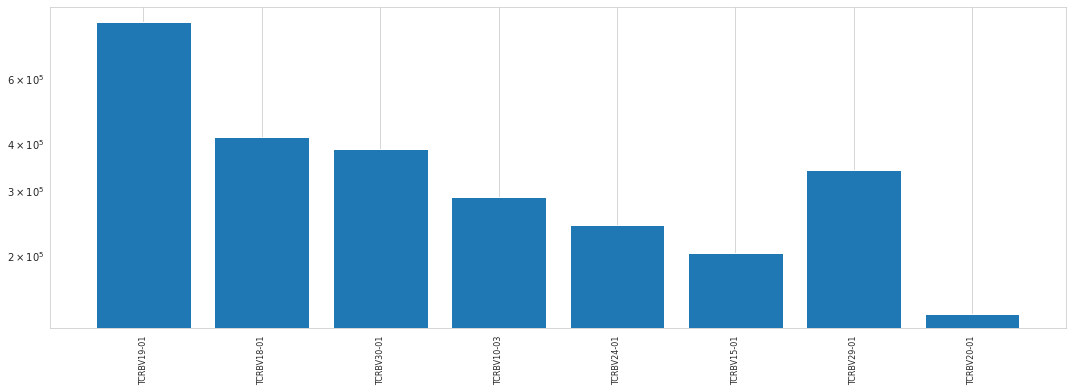

In [20]:
# bar plot
plt.bar(genes_dict.keys(), genes_dict.values())
# change y axis to log scale
plt.yscale('log')
# make the plot larger
plt.gcf().set_size_inches(15, 5)
# wider bars for better visualization
plt.tight_layout()
# make x axis labels horizontal and smaller
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
# show plot
plt.show()

In [21]:
# extract duplicate sequences
duplicate_seq = data_to_use_filtered[data_to_use_filtered['Sequences'].duplicated(keep=False)]
duplicate_seq = duplicate_seq[['Sequences', 'Appearances', 'Private_Public_label', gene_name]]
duplicate_seq

,Sequences,Appearances,Private_Public_label,vGeneName
20,CASSLGETQYF,788,1,TCRBV19-01
26,CASSLGETQYF,788,1,TCRBV18-01
54,CASSLGGNTEAFF,636,1,TCRBV30-01
55,CASSLGGNTEAFF,636,1,TCRBV19-01
63,CASSLGGNTEAFF,636,1,TCRBV18-01
...,...,...,...,...
4463872,CATRRGTSGNTIYF,2,1,TCRBV15-01
4464012,CSVGYQETQYF,2,1,TCRBV29-01
4464013,CSVGYQETQYF,2,1,TCRBV20-01
4464092,CSPFKGETQYF,2,1,TCRBV20-01


In [22]:
# keep the first instance of each sequence
duplicate_seq_to_remove = duplicate_seq['Sequences'].tolist()
df = pd.DataFrame(duplicate_seq_to_remove, columns=['Sequences'])
seq_to_remove_no_dup = list(df.drop_duplicates(keep="first")['Sequences'])
len(seq_to_remove_no_dup)

52740

In [23]:
# remove duplicate sequences from data (that are in seq_to_remove_no_dup)
data_to_use_filtered_no_dup = data_to_use_filtered[~data_to_use_filtered['Sequences'].isin(seq_to_remove_no_dup)]

In [24]:
data_to_use_filtered_no_dup = data_to_use_filtered_no_dup[['Sequences', 'Appearances', 'Private_Public_label', gene_name]]
data_to_use_filtered_no_dup

,Sequences,Appearances,Private_Public_label,vGeneName
3929,CASSLVGNTEAFF,287,1,TCRBV19-01
4532,CASSLDYEQYF,275,1,TCRBV18-01
4564,CASSYSYEQYF,275,1,TCRBV18-01
5604,CASSLAGNYGYTF,253,1,TCRBV18-01
6095,CASSLVGETQYF,248,1,TCRBV19-01
...,...,...,...,...
14938520,CSAAPGPKPQNIQYF,1,0,TCRBV29-01
14938521,CSVEQAAGGIGNTIYF,1,0,TCRBV29-01
14938523,CAISESNGGASGNTIYF,1,0,TCRBV10-03
14938524,CASLTRDSTTIPSGNTIYF,1,0,TCRBV19-01


##### Gene Bar Plot Excluding Duplicates

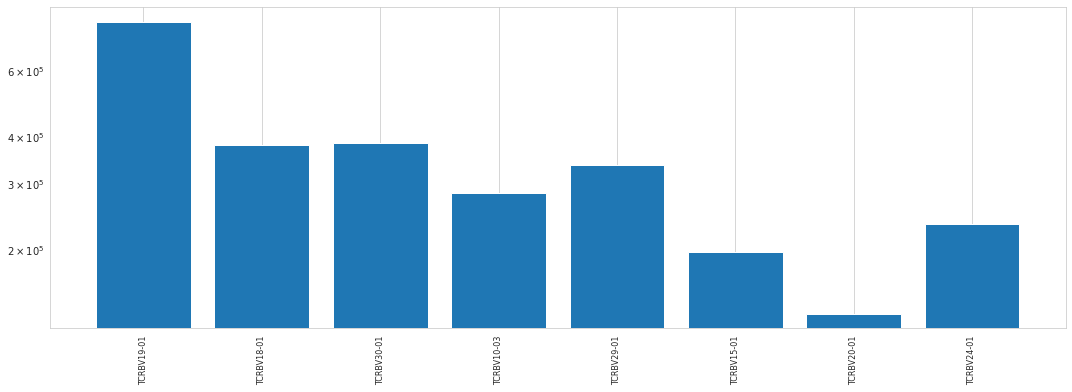

In [25]:
genes_no_dup = collections.Counter(data_to_use_filtered_no_dup[gene_name])
# bar plot
plt.bar(genes_no_dup.keys(), genes_no_dup.values())
# change y axis to log scale
plt.yscale('log')
# make the plot larger
plt.gcf().set_size_inches(15, 5)
# wider bars for better visualization
plt.tight_layout()
# make x axis labels horizontal and smaller
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
# show plot
plt.show()

In [26]:
genes_no_dup

Counter({'TCRBV19-01': 813614,
         'TCRBV18-01': 381766,
         'TCRBV30-01': 385557,
         'TCRBV10-03': 284286,
         'TCRBV29-01': 336560,
         'TCRBV15-01': 198028,
         'TCRBV20-01': 135252,
         'TCRBV24-01': 234942})

##### Create subsample of data

In [27]:
# Resamples df_counts into df_counts_small
# in data_to_use_filtered_nona_TCRBV_no_dup group by vGeneName and keep 3% of each group
def filter_data(df):
    if len(df) < 10000:
        return df
    else:
        return df.sample(frac=0.5, random_state=3)

In [28]:
gene_small_set = data_to_use_filtered_no_dup.groupby(gene_name, sort=False).apply(filter_data).reset_index(drop=True)
gene_small_set

,Sequences,Appearances,Private_Public_label,vGeneName
0,CASSSDRRFYEQYF,1,0,TCRBV19-01
1,CASSIATASGRDTQYF,1,0,TCRBV19-01
2,CASSPLGGLGQYF,2,1,TCRBV19-01
3,CASSIVWGSIGRGGNIQYF,1,0,TCRBV19-01
4,CASSDGGTGSNEQFF,1,0,TCRBV19-01
...,...,...,...,...
1384997,CATSDSDRGSYGYTF,1,0,TCRBV24-01
1384998,CATSDVVPGPTYNEQFF,1,0,TCRBV24-01
1384999,CATSGSLAGVLHEQFF,1,0,TCRBV24-01
1385000,CATSDYGSGPSSYNEQFF,1,0,TCRBV24-01


In [29]:
if gene_type=='J':
    gene_small_set.jGeneName.value_counts()
else:
    gene_small_set.vGeneName.value_counts()

In [30]:
tcrb_data_sample = gene_small_set

In [31]:
tcrb_data_sample

,Sequences,Appearances,Private_Public_label,vGeneName
0,CASSSDRRFYEQYF,1,0,TCRBV19-01
1,CASSIATASGRDTQYF,1,0,TCRBV19-01
2,CASSPLGGLGQYF,2,1,TCRBV19-01
3,CASSIVWGSIGRGGNIQYF,1,0,TCRBV19-01
4,CASSDGGTGSNEQFF,1,0,TCRBV19-01
...,...,...,...,...
1384997,CATSDSDRGSYGYTF,1,0,TCRBV24-01
1384998,CATSDVVPGPTYNEQFF,1,0,TCRBV24-01
1384999,CATSGSLAGVLHEQFF,1,0,TCRBV24-01
1385000,CATSDYGSGPSSYNEQFF,1,0,TCRBV24-01


In [49]:
# take 10 random sequences from each j Gene
# if gene_type=='J':
#     j_gene_sequences = data_to_use_filtered.groupby(gene_type, sort=False).apply(lambda x: x.sample(10)).reset_index(drop=True)
#     j_gene_sequences.to_csv('/home/romi/projects/preTCR/CDR3_data/cdr3_by_jgene_groups.csv')

#### Create and Display embeddings

In [32]:
# export subsample data to csv
if gene_type == 'J':
    output_df_csv = "jgene_subsample.csv"
else:
    output_df_csv = "vgene_subsample.csv"

tcrb_data_sample.to_csv(output_df_csv)

In [ ]:
from cvc.embbeding_wrapper import EmbeddingWrapper

# Create embeddings
embed_wrap = EmbeddingWrapper(TRANSFORMER, DEVICE, tcrb_data_sample, batch_size=1024, method="mean", layers=[-1])
embed_wrap.embeddings.shape

In [ ]:
# output embeddings to csv
if gene_type == 'J':
    output_embeddings_path = "/home/romi/projects/preTCR/CDR3_data/j_gene_embeddings.csv"
else:
    output_embeddings_path = "/home/romi/projects/preTCR/CDR3_data/v_gene_embeddings.csv"
tcrb_embeddings_df = pd.DataFrame(embed_wrap.embeddings)
tcrb_embeddings_df.to_csv(output_embeddings_path)

In [34]:
# create anndata object
tcrb_embeddings_adata = embed_wrap.create_anndata()
tcrb_embeddings_adata

/opt/conda/envs/tcrbert/lib/python3.9/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 1385002 × 768
    obs: 'Sequences', 'Appearances', 'Private_Public_label', 'vGeneName'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

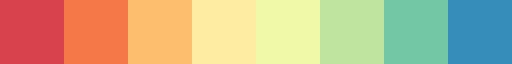

In [35]:
# Create colormap for genes
color_map = ListedColormap(sns.color_palette("Spectral", len(genes_dict.keys())))
color_map

In [ ]:
# to display by private/public label make flag equal to 1
DISPLAY_PUB_PRIV = 0

In [ ]:
if DISPLAY_PUB_PRIV == 1:
    color_label = 'Private_Public_label'
    title = "UMAP of Embeddings, Colored by Public/Private Label"
    colors = ['gold', 'darkblue']
    legend_size=7
    cmap_colors = matplotlib.colors.ListedColormap(colors)
    pdf_title = "umap_genes_pub_priv_embeddings.pdf"
else:
    if gene_type == 'J':
        color_label = 'jGeneName'
        title = "UMAP of Embeddings, Colored by J Genes"
        cmap_colors = color_map
        legend_size = 2
        pdf_title = "umap_j_genes.pdf"
    else:
        color_label = 'vGeneName'
        title = "UMAP of Embeddings, Colored by V Genes"
        cmap_colors = color_map
        legend_size = 2
        pdf_title = "umap_v_genes.pdf"